In [15]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [16]:
df=pd.read_csv(r"C:\Users\AMIT SAHU\Desktop\December Challenge\Churn_Modelling.csv")
df.drop(columns=["RowNumber","Surname","CustomerId"],inplace=True)
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True,dtype=float)

In [17]:
x=df.drop(columns="Exited",axis=1)
y=df["Exited"]

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled.shape

(10000, 11)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=2)
x_train

array([[ 1.27752881, -1.23214003, -0.00442596, ..., -0.57873591,
        -0.57380915, -1.09598752],
       [-0.50211661,  0.29351742,  0.34135195, ...,  1.72790383,
        -0.57380915, -1.09598752],
       [ 0.67741582, -0.08789694, -1.38753759, ..., -0.57873591,
        -0.57380915, -1.09598752],
       ...,
       [ 2.06388377, -0.27860412, -0.69598177, ..., -0.57873591,
        -0.57380915,  0.91241915],
       [-1.02980217,  1.43776051, -0.00442596, ...,  1.72790383,
        -0.57380915,  0.91241915],
       [ 0.03591573, -1.04143285,  0.68712986, ..., -0.57873591,
        -0.57380915, -1.09598752]])

In [20]:
model=Sequential()


In [21]:
model.add(Dense(3,activation="sigmoid",input_dim=11))
model.add(Dense(1,activation="sigmoid"))

c:\Users\AMIT SAHU\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',optimizer="Adam")

In [29]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3898 - val_loss: 0.3688
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3996 - val_loss: 0.3692
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3988 - val_loss: 0.3694
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3845 - val_loss: 0.3695
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4017 - val_loss: 0.3697
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4025 - val_loss: 0.3699
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3827 - val_loss: 0.3698
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3953 - val_loss: 0.3698
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3821 - val_loss: 0.3698
Epoch 10/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3907 - val_loss: 0.3698
Epoch 11/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3892 - val_loss: 0.3698
Epoch 12/100
200/200 ━━━━━━━━━━━━━━━━━━━━

In [25]:
model.layers[0].get_weights()

[array([[ 3.1549370e-01,  4.1384809e-04,  2.0470055e-02],
        [-3.2856877e+00,  2.0247180e+00,  7.1755791e-01],
        [ 5.4584403e-02, -5.7284981e-02,  1.5870526e-01],
        [-2.6645717e-01,  8.1380576e-01,  1.1538299e+00],
        [-1.0176889e+00,  9.2719507e-01,  3.1929328e+00],
        [-4.7321761e-01, -3.9471108e-01, -8.3270513e-02],
        [ 1.4143284e-01, -1.5918779e-01,  8.0047959e-01],
        [ 2.8909615e-01,  1.0778962e-01, -1.2916961e-01],
        [-1.6263507e-01,  1.2251218e-01, -8.8651985e-01],
        [-5.4442626e-01, -2.2832032e-01,  7.8193538e-02],
        [ 9.0363137e-02, -5.5361581e-01,  6.8205766e-02]], dtype=float32),
 array([ 0.52636015, -0.50275826,  1.7425518 ], dtype=float32)]

In [31]:
pred=model.predict(x_train)
pred=np.where(pred>0.5,1,0)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [32]:
acc=accuracy_score(pred,y_train)
print(acc)

0.859


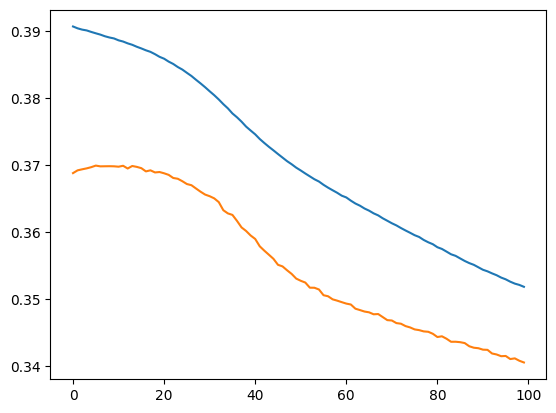

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122 (492.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 82 (332.00 B)